In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import scipy.stats as stats

In [351]:
sns.set(style="whitegrid")

### 1. Import Data

In [352]:
data = pd.read_csv("data.csv")

In [353]:
data.describe()

,last,volume
count,451113.000000,4.511130e+05
mean,2751.772257,3.469636e+06
std,3988.203423,8.373189e+06
min,63.000000,0.000000e+00
25%,1099.145800,7.861000e+05
50%,1901.445100,1.614400e+06
75%,3169.704000,3.595100e+06
max,109550.000000,7.289341e+08


### 2. Basic EDA

In [354]:
# Basic EDA
print("=============== showing the top few lines of the dataset ===============")
print(data.head())
print("\n\n=============== show column statistics ===============")
print(data.describe())
print("\n\n=============== show column type ===============")
print(data.info())

=============== showing the top few lines of the dataset ===============
    ticker        date      last   volume
0  1332 JT  2013-01-04  169.0987  1464100
1  1332 JT  2013-01-07  166.3266  1783500
2  1332 JT  2013-01-08  166.3266  1759800
3  1332 JT  2013-01-09  165.4026   767800
4  1332 JT  2013-01-10  167.2507  1503100


=============== show column statistics ===============
                last        volume
count  451113.000000  4.511130e+05
mean     2751.772257  3.469636e+06
std      3988.203423  8.373189e+06
min        63.000000  0.000000e+00
25%      1099.145800  7.861000e+05
50%      1901.445100  1.614400e+06
75%      3169.704000  3.595100e+06
max    109550.000000  7.289341e+08


=============== show column type ===============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451113 entries, 0 to 451112
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ticker  451113 non-null  object 
 1   date    451113 non-null

### 3. Check Missing/Duplicated/Outlier/Low Count Values

In [355]:
print(data.isnull().sum() / len(data))

ticker    0.0
date      0.0
last      0.0
volume    0.0
dtype: float64


In [356]:
print(data[data.duplicated()])

Empty DataFrame
Columns: [ticker, date, last, volume]
Index: []


In [357]:
data = data.reset_index()
data = data.drop("index", axis = 1)

#### Check last Outlier

In [358]:
df_pct_change = data.groupby('ticker')['last'].pct_change()

In [359]:
df_pct_change.describe()

count    450865.000000
mean          0.000611
std           0.020985
min          -0.272727
25%          -0.010107
50%           0.000000
75%           0.010965
max           0.564467
Name: last, dtype: float64

#### Check volume Outlier

In [360]:
df_vol_pct_change = data.groupby('ticker')['volume'].pct_change()

In [361]:
df_vol_pct_change.describe()

count    4.508650e+05
mean              inf
std               NaN
min     -1.000000e+00
25%     -2.247711e-01
50%     -1.453664e-02
75%      2.662767e-01
max               inf
Name: volume, dtype: float64

In [362]:
data[data["volume"] == 0]

,ticker,date,last,volume
41465,2801 JT,2014-06-12,2020.6993,0
62707,3382 JT,2017-04-26,4195.2586,0
115428,4507 JT,2018-10-04,7431.9611,0
363412,8601 JT,2017-04-26,603.3752,0
381457,8801 JT,2017-04-26,2318.2923,0
393635,9007 JT,2014-06-12,1812.0876,0


#### Remove Zero volume Rows

In [363]:
data = data[data["volume"] != 0]

In [364]:
df_vol_pct_change = data.groupby('ticker')['volume'].pct_change()
df_vol_pct_change.describe()

count    450859.000000
mean          0.089552
std           0.640433
min          -0.947382
25%          -0.224765
50%          -0.014535
75%           0.266252
max         138.845806
Name: volume, dtype: float64

#### Check if a stock has low count value

In [365]:
id_counts = data.groupby('ticker').size()

In [366]:
id_counts.describe()

count     248.000000
mean     1818.979839
std       458.586629
min        55.000000
25%      2005.000000
50%      2005.000000
75%      2005.000000
max      2005.000000
dtype: float64

<Axes: >

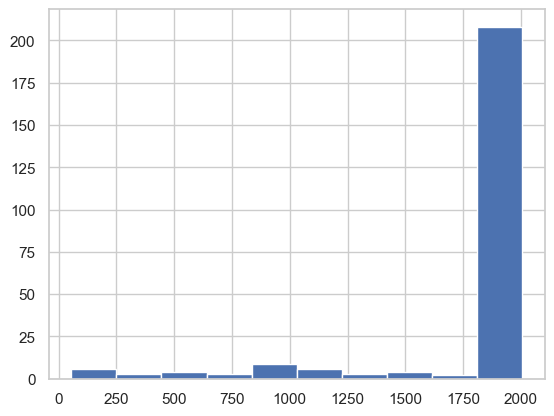

In [367]:
id_counts.hist()

#### Remove stocks with count value lower than 1500

In [368]:
cleaned_data = data.groupby('ticker').filter(lambda x: len(x) >= 1500)

In [369]:
cleaned_data.groupby('ticker').size().describe()

count     213.000000
mean     1991.877934
std        65.825843
min      1519.000000
25%      2005.000000
50%      2005.000000
75%      2005.000000
max      2005.000000
dtype: float64

### 4. Calculate Return

In [370]:
cleaned_data['return'] = cleaned_data.groupby('ticker')['last'].pct_change()
cleaned_data['return'].fillna(0, inplace=True)
# Shift the return by -1 
cleaned_data['return'] = cleaned_data.groupby('ticker')['return'].shift(-1)

In [371]:
cleaned_data

,ticker,date,last,volume,return
0,1332 JT,2013-01-04,169.0987,1464100,-0.016393
1,1332 JT,2013-01-07,166.3266,1783500,0.000000
2,1332 JT,2013-01-08,166.3266,1759800,-0.005555
3,1332 JT,2013-01-09,165.4026,767800,0.011173
4,1332 JT,2013-01-10,167.2507,1503100,0.022099
...,...,...,...,...,...
451108,9984 JT,2021-03-15,10370.0000,12041200,0.024108
451109,9984 JT,2021-03-16,10620.0000,11346000,-0.020716
451110,9984 JT,2021-03-17,10400.0000,9771000,-0.017308
451111,9984 JT,2021-03-18,10220.0000,13941600,-0.024560


### 5. Pair Plot and Heatmap

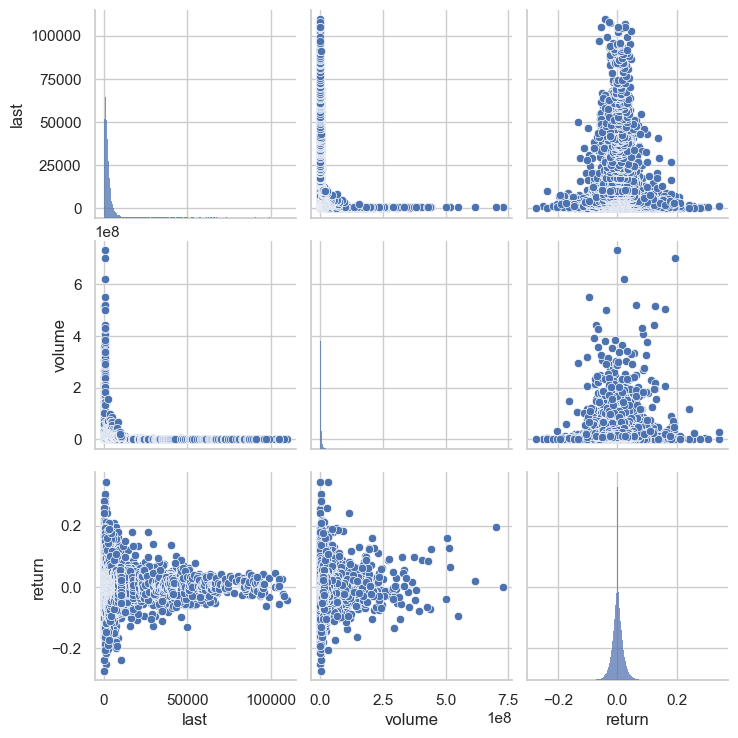

In [372]:
sns.pairplot(cleaned_data)
plt.show()

/var/folders/sc/2_jfk4wn4x5d3vhvmvsfngkm0000gn/T/ipykernel_21343/2285576937.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cleaned_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


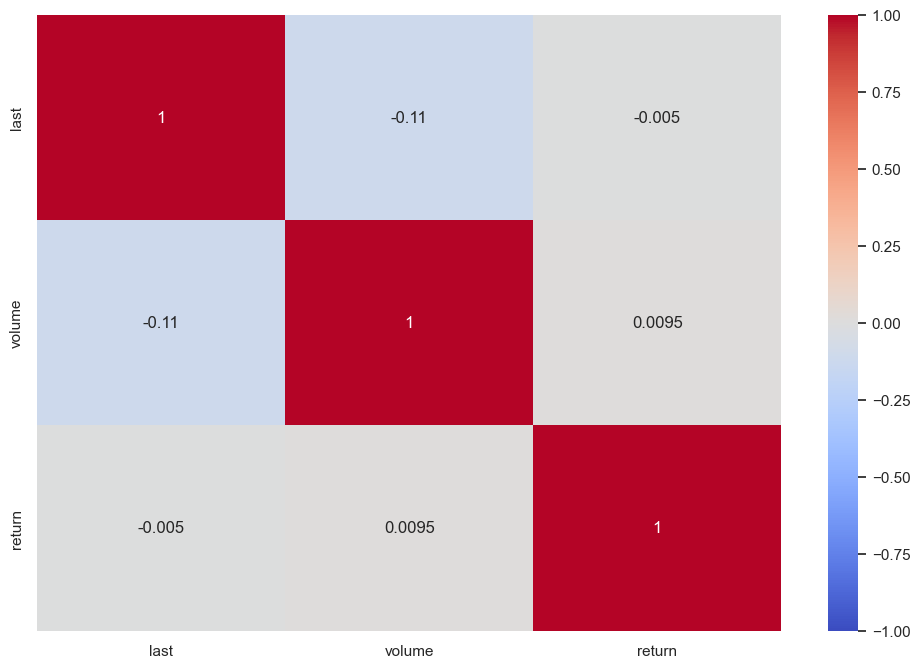

In [373]:
plt.figure(figsize=(12,8))
sns.heatmap(cleaned_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

### 4. Signal Construction

In [374]:
cleaned_data['20_day_skewness'] = cleaned_data.groupby('ticker')['volume'].rolling(window=20).skew().reset_index(level=0, drop=True)

In [375]:
def sorted_position_index(arr):
    sorted_arr = arr.sort_values(ascending=False)
    return sorted_arr.index.get_loc(arr.index[-1]) + 1  # Adding 1 to start ranking from 1

cleaned_data['10_day_sorted_rank'] = cleaned_data.groupby('ticker')['volume'].rolling(window=10).apply(sorted_position_index, raw=False).reset_index(level=0, drop=True)


20 day skew of the volume * rank of the volume in 10 days

In [377]:
cleaned_data['alpha1'] = -cleaned_data['20_day_skewness'] * cleaned_data['10_day_sorted_rank']

<Axes: >

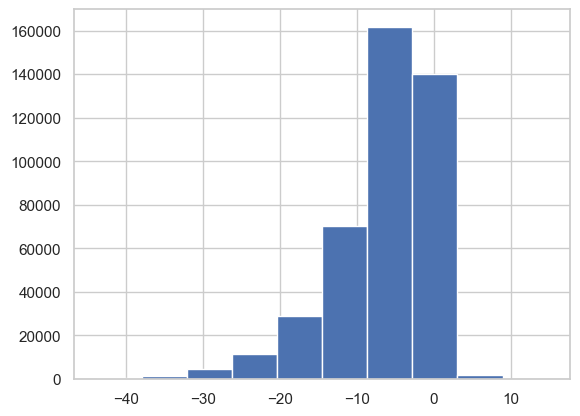

In [378]:
cleaned_data['alpha1'].hist()

<Axes: >

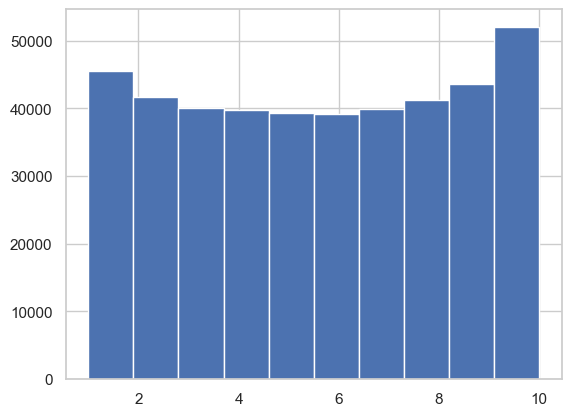

In [384]:
cleaned_data['10_day_sorted_rank'].hist()

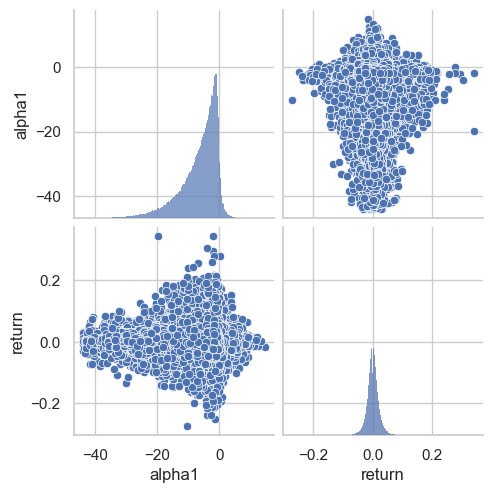

In [380]:
sns.pairplot(cleaned_data[["alpha1", "return"]])
plt.show()

/var/folders/sc/2_jfk4wn4x5d3vhvmvsfngkm0000gn/T/ipykernel_21343/2285576937.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cleaned_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


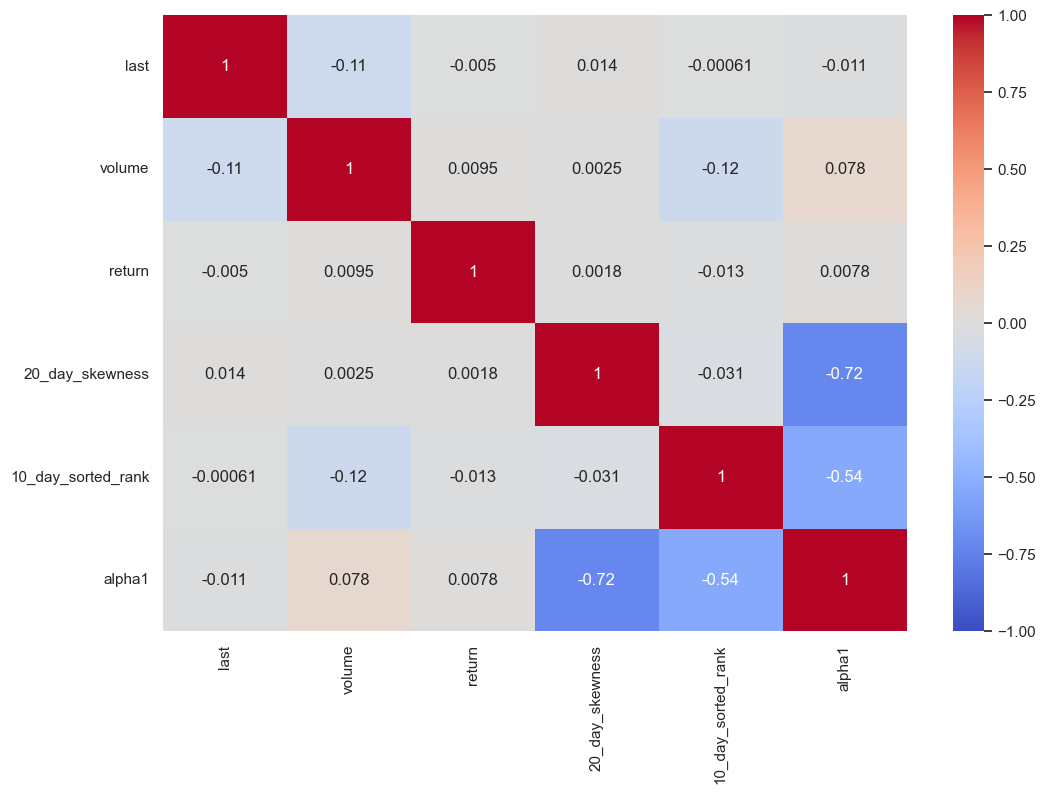

In [381]:
plt.figure(figsize=(12,8))
sns.heatmap(cleaned_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

### 5. Train Test Split

In [382]:
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'])

Train: 2013 - 2018
Test: 2019 - 2021

In [383]:
train_data = cleaned_data[cleaned_data['date'].dt.year <= 2018].copy()
test_data = cleaned_data[cleaned_data['date'].dt.year > 2018].copy()

In [385]:
train_data

,ticker,date,last,volume,return,20_day_skewness,10_day_sorted_rank,alpha1
0,1332 JT,2013-01-04,169.0987,1464100,-0.016393,NaN,NaN,NaN
1,1332 JT,2013-01-07,166.3266,1783500,0.000000,NaN,NaN,NaN
2,1332 JT,2013-01-08,166.3266,1759800,-0.005555,NaN,NaN,NaN
3,1332 JT,2013-01-09,165.4026,767800,0.011173,NaN,NaN,NaN
4,1332 JT,2013-01-10,167.2507,1503100,0.022099,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
450573,9984 JT,2018-12-21,3749.2951,26316600,-0.075843,0.266933,1.0,-0.266933
450574,9984 JT,2018-12-25,3464.9370,20994600,-0.013631,0.504932,5.0,-2.524661
450575,9984 JT,2018-12-26,3417.7080,26705600,0.047934,0.351706,1.0,-0.351706
450576,9984 JT,2018-12-27,3581.5337,25887600,0.003434,0.183200,3.0,-0.549599


In [386]:
test_data

,ticker,date,last,volume,return,20_day_skewness,10_day_sorted_rank,alpha1
1470,1332 JT,2019-01-04,597.6129,2188000,0.013008,-0.179528,8.0,1.436227
1471,1332 JT,2019-01-07,605.3868,1751500,0.016051,-0.252797,10.0,2.527975
1472,1332 JT,2019-01-08,615.1041,2184800,0.022117,-0.211769,8.0,1.694152
1473,1332 JT,2019-01-09,628.7083,3532800,0.006182,-0.207072,2.0,0.414144
1474,1332 JT,2019-01-10,632.5952,2512500,-0.012289,-0.104286,5.0,0.521429
...,...,...,...,...,...,...,...,...
451108,9984 JT,2021-03-15,10370.0000,12041200,0.024108,0.268041,7.0,-1.876288
451109,9984 JT,2021-03-16,10620.0000,11346000,-0.020716,0.316412,8.0,-2.531298
451110,9984 JT,2021-03-17,10400.0000,9771000,-0.017308,0.491765,10.0,-4.917647
451111,9984 JT,2021-03-18,10220.0000,13941600,-0.024560,0.335816,6.0,-2.014895


In [387]:
train_data.describe()

,last,volume,return,20_day_skewness,10_day_sorted_rank,alpha1
count,312377.000000,3.123770e+05,312377.000000,308330.000000,310460.000000,308330.000000
mean,2627.092589,3.729408e+06,0.000594,1.208686,5.586774,-6.675170
std,3435.936695,9.354875e+06,0.020433,0.846898,2.958005,6.323589
min,63.000000,3.310000e+04,-0.272727,-1.488975,1.000000,-43.372346
25%,1090.162500,8.407000e+05,-0.009901,0.603985,3.000000,-9.549324
50%,1866.118800,1.715400e+06,0.000000,1.077077,6.000000,-4.922988
75%,3109.991000,3.803200e+06,0.010851,1.685607,8.000000,-2.042416
max,60077.524000,7.289341e+08,0.342466,4.469916,10.000000,14.769869


In [388]:
test_data.describe()

,last,volume,return,20_day_skewness,10_day_sorted_rank,alpha1
count,111893.000000,1.118930e+05,111680.000000,111893.000000,111893.000000,111893.000000
mean,3267.759801,2.975487e+06,0.000663,1.123997,5.615812,-6.225159
std,5490.172167,5.874949e+06,0.021755,0.848750,3.000632,6.306975
min,64.000000,5.380000e+04,-0.236426,-1.681687,1.000000,-43.868628
25%,1182.501200,6.874000e+05,-0.010465,0.518058,3.000000,-8.859339
50%,2120.488000,1.408800e+06,0.000000,0.981037,6.000000,-4.397380
75%,3535.447700,3.163600e+06,0.011123,1.601738,8.000000,-1.745275
max,109550.000000,2.398162e+08,0.279152,4.465257,10.000000,13.379741


### 6. Backtest

In [392]:
initial_investment = 1e6 
risk_free_rate = 0.00

signals = ['alpha1']

cumulative_returns_in_sample = pd.DataFrame(index=train_data['date'].unique(), columns=signals)
cumulative_returns_in_sample.sort_index(inplace=True)
cumulative_returns_out_sample = pd.DataFrame(index=test_data['date'].unique(), columns=signals)
cumulative_returns_out_sample.sort_index(inplace=True)
evaluation_metrics_in_sample = pd.DataFrame(index=signals, columns=['Annual Sharpe Ratio', 'Annual Return Rate', 'Maximum Drawdown', 'Turnover Rate', 'Hit Ratio'])
evaluation_metrics_out_sample = pd.DataFrame(index=signals, columns=['Annual Sharpe Ratio', 'Annual Return Rate', 'Maximum Drawdown', 'Turnover Rate', 'Hit Ratio'])

In [393]:
def back_test(df, in_sample, signal):
    df[signal].fillna(0, inplace=True)
    df[signal+'_decile'] = df.groupby('date')[signal].transform(lambda x: pd.qcut(x, 10, labels=False, duplicates='drop'))
    df[signal+'_daily_return'] = np.where(df[signal+'_decile'] == 0, -df['return'], 0) 
    df[signal+'_daily_return'] += np.where(df[signal+'_decile'] == 9, df['return'], 0)
    daily_returns = df.groupby('date')[signal+'_daily_return'].mean()

    if in_sample:
        cumulative_returns_in_sample[signal] = (1 + daily_returns).cumprod()
        cumulative_returns = cumulative_returns_in_sample.copy()
    else:
        cumulative_returns_out_sample[signal] = (1 + daily_returns).cumprod()
        cumulative_returns = cumulative_returns_out_sample.copy() 
    
    # Sharpe and return rate
    sharpe_ratio = (daily_returns.mean() - risk_free_rate/260) / daily_returns.std() * (260)**0.5
    
    if in_sample:
        return_rate = (cumulative_returns[signal].iloc[-1])**0.5 - 1
    else:
        return_rate = (cumulative_returns[signal].iloc[-1]) - 1
    
    # Max Drawdown
    running_max = cumulative_returns[signal].cummax()
    drawdowns = 1 - cumulative_returns[signal] / running_max
    max_drawdown = drawdowns.max()
    
    # Hit Ratio
    hit_ratio = (daily_returns > 0).mean()
    
    # Turnover rate
    df['previous_top_decile'] = df.groupby('date')[signal+'_decile'].shift(1) == 9
    df['current_top_decile'] = df[signal+'_decile'] == 9
    df['previous_bottom_decile'] = df.groupby('date')[signal+'_decile'].shift(1) == 0
    df['current_bottom_decile'] = df[signal+'_decile'] == 0

    df['top_turnover'] = df['previous_top_decile'] != df['current_top_decile']
    df['bottom_turnover'] = df['previous_bottom_decile'] != df['current_bottom_decile']
    
    daily_turnover_rate = (df.groupby('date')['top_turnover'].sum() + df.groupby('date')['bottom_turnover'].sum()) / 80
    
    if in_sample:
        evaluation_metrics_in_sample.loc[signal] = [sharpe_ratio, return_rate, max_drawdown, daily_turnover_rate.mean(), hit_ratio]
    else:
        evaluation_metrics_out_sample.loc[signal] = [sharpe_ratio, return_rate, max_drawdown, daily_turnover_rate.mean(), hit_ratio]




=== PnL for each signal in sample (2020 - 2021)  ===
                  alpha1
2013-01-04  1.000000e+06
2013-01-07  1.000000e+06
2013-01-08  1.000000e+06
2013-01-09  1.000000e+06
2013-01-10  1.000000e+06
...                  ...
2018-12-21  1.030842e+06
2018-12-25  1.031168e+06
2018-12-26  1.030765e+06
2018-12-27  1.030889e+06
2018-12-28  1.029071e+06

[1470 rows x 1 columns]

=== PnL for each signal out sample (2022)  ===
                  alpha1
2019-01-04  1.000194e+06
2019-01-07  1.001729e+06
2019-01-08  1.001358e+06
2019-01-09  1.000971e+06
2019-01-10  1.001106e+06
...                  ...
2021-03-15  1.009458e+06
2021-03-16  1.010189e+06
2021-03-17  1.010148e+06
2021-03-18  1.011093e+06
2021-03-19  1.011093e+06

[535 rows x 1 columns]


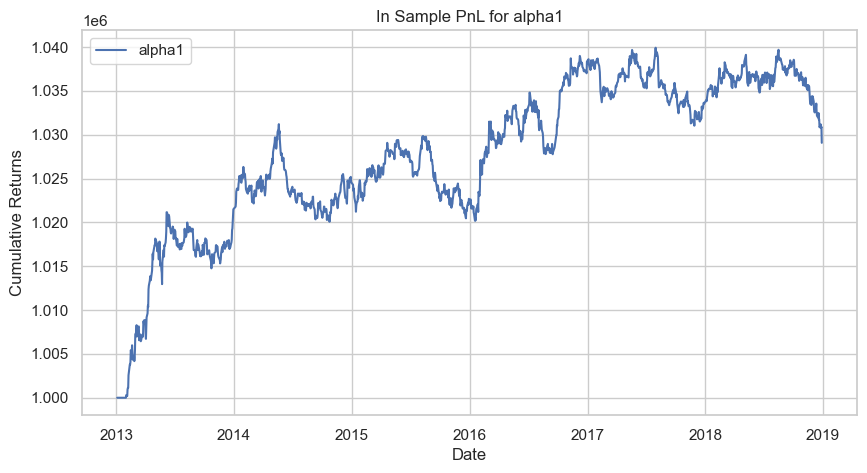

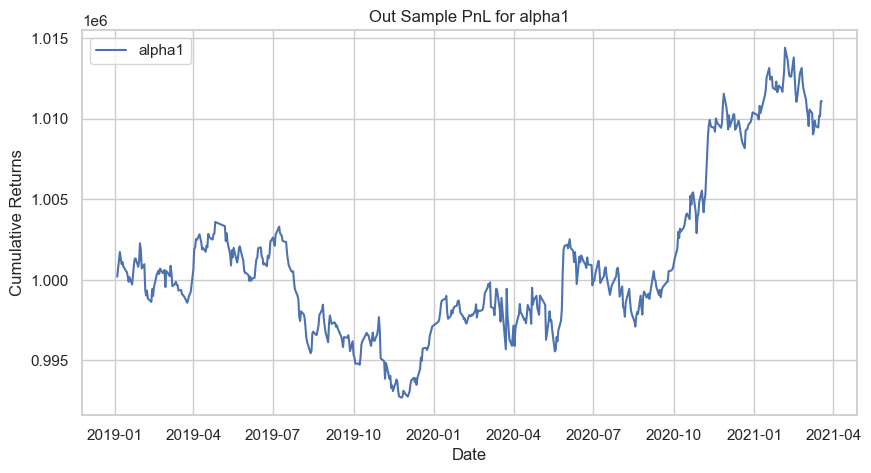


=== Evaluation Metrics for each signal in sample===
       Annual Sharpe Ratio Annual Return Rate Maximum Drawdown Turnover Rate  \
alpha1            0.579716           0.014431         0.010793        0.9496   

       Hit Ratio  
alpha1  0.505442  

=== Evaluation Metrics for each signal out sample===
       Annual Sharpe Ratio Annual Return Rate Maximum Drawdown Turnover Rate  \
alpha1            0.526683           0.011093         0.010868      0.931262   

       Hit Ratio  
alpha1  0.508411  


In [394]:
for signal in signals:
    back_test(test_data, in_sample = False, signal=signal)
    back_test(train_data, in_sample = True, signal=signal)
    
cumulative_returns_in_sample *= initial_investment
cumulative_returns_out_sample *= initial_investment

print("\n=== PnL for each signal in sample (2020 - 2021)  ===")
print(cumulative_returns_in_sample)
print("\n=== PnL for each signal out sample (2022)  ===")
print(cumulative_returns_out_sample)


Visualize the PnL Curve
 
for signal in signals:  
    plt.figure(figsize=(10,5))
    plt.plot(cumulative_returns_in_sample.index, cumulative_returns_in_sample[signal], label=signal)
    plt.title('In Sample PnL for ' + signal)
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend(loc='upper left')
    plt.show()
    
for signal in signals:  
    plt.figure(figsize=(10,5))
    plt.plot(cumulative_returns_out_sample.index, cumulative_returns_out_sample[signal], label=signal)
    plt.title('Out Sample PnL for ' + signal)
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend(loc='upper left')
    plt.show()

    

# Annual Sharpe Ratio, Annual Return, Max Drawdown, Turnover Rate, Hit Ratio 
print("\n=== Evaluation Metrics for each signal in sample===")
print(evaluation_metrics_in_sample)
print("\n=== Evaluation Metrics for each signal out sample===")
print(evaluation_metrics_out_sample)